<a href="https://colab.research.google.com/github/yacine715/GITHUB_TOKEN/blob/main/test_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('builds_1.csv')



In [ ]:
data.head()


,repo,branch,id_build,commit_hash,status,Etat,created_at,updated_at,duration,total_files,additions,deletions,gh_src_files,gh_src_churn,file_types,language,total_builds,doc_files_count
0,aria2/aria2,master,8258172404,a8cb271b044230f38085be7fc185c30eb1f52d36,success,completed,2024-03-13T01:48:07Z,2024-03-13T01:52:33Z,266.0,4,7,7,0,0,"android, mingw",C++,100,0
1,aria2/aria2,master,8242353682,a8cb271b044230f38085be7fc185c30eb1f52d36,success,completed,2024-03-12T01:47:20Z,2024-03-12T01:51:36Z,256.0,4,7,7,0,0,"android, mingw",C++,100,0
2,aria2/aria2,master,8226511389,a8cb271b044230f38085be7fc185c30eb1f52d36,success,completed,2024-03-11T01:47:35Z,2024-03-11T01:52:06Z,271.0,4,7,7,0,0,"android, mingw",C++,100,0
3,aria2/aria2,master,8218736543,a8cb271b044230f38085be7fc185c30eb1f52d36,success,completed,2024-03-10T01:48:29Z,2024-03-10T01:52:54Z,265.0,4,7,7,0,0,"android, mingw",C++,100,0
4,aria2/aria2,master,8211281149,a8cb271b044230f38085be7fc185c30eb1f52d36,success,completed,2024-03-09T01:46:00Z,2024-03-09T01:50:07Z,247.0,4,7,7,0,0,"android, mingw",C++,100,0


<Axes: >

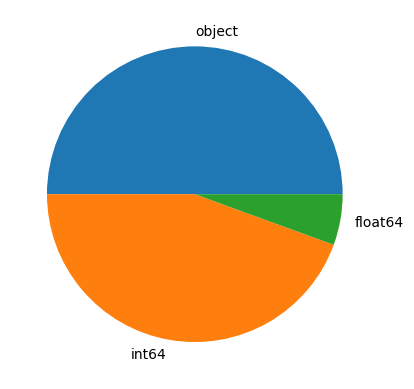

In [ ]:
data.dtypes.value_counts().plot.pie()

In [ ]:

# Assuming 'data' is your DataFrame
# Identification of numerical and categorical columns using dtypes
colonnes_numeriques = data.select_dtypes(include=['int64', 'float64']).columns
colonnes_categorielles = data.select_dtypes(include=['object']).columns

# Replacement of missing values
for col in colonnes_numeriques:
    data[col].fillna(data[col].median(), inplace=True)
for col in colonnes_categorielles:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Checking for any remaining missing values in the dataset
missing_values_after = data.isnull().sum().sum()
print(f"Remaining missing values in the dataset: {missing_values_after}")



Remaining missing values in the dataset: 0


In [ ]:

# Assuming 'data' is the DataFrame loaded from 'builds_1.csv'
# Identify categorical columns to encode. Adjust this list based on your specific needs and the dataset's characteristics.
categorical_columns_to_encode = ['status', 'Etat', 'file_types', 'language']

# Filter out columns that actually exist in your DataFrame (in case of any previous modifications)
existing_categorical_columns = [col for col in categorical_columns_to_encode if col in data.columns]

# Proceed with one-hot encoding only if there are existing categorical columns to encode
if existing_categorical_columns:
    encoder = OneHotEncoder(sparse=False)
    encoded = encoder.fit_transform(data[existing_categorical_columns])

    # Check the version of scikit-learn to use the appropriate method for getting feature names
    sklearn_version = sklearn.__version__
    if sklearn_version < '0.22':
        feature_names = encoder.get_feature_names(existing_categorical_columns)
    else:
        feature_names = encoder.get_feature_names_out()

    # Create a DataFrame for the encoded variables
    df_categorielles = pd.DataFrame(encoded, columns=feature_names)

    # Remove the original categorical columns and add the new one-hot encoded columns
    data = data.drop(existing_categorical_columns, axis=1).reset_index(drop=True)
    df_categorielles = df_categorielles.reset_index(drop=True)
    data = pd.concat([data, df_categorielles], axis=1)
else:
    print("No new or unencoded categorical columns to encode.")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
data.dtypes

repo                    object
branch                  object
id_build                 int64
commit_hash             object
created_at              object
                        ...   
language_Swift         float64
language_TypeScript    float64
language_Unknown       float64
language_Vim Script    float64
language_Vue           float64
Length: 866, dtype: object

In [ ]:

# Normalisation
scaler = StandardScaler()
data[colonnes_numeriques] = scaler.fit_transform(data[colonnes_numeriques])

In [ ]:
data.dtypes


repo                    object
branch                  object
id_build               float64
commit_hash             object
created_at              object
                        ...   
language_Swift         float64
language_TypeScript    float64
language_Unknown       float64
language_Vim Script    float64
language_Vue           float64
Length: 866, dtype: object

In [ ]:
data.isnull().sum()

repo                   0
branch                 0
id_build               0
commit_hash            0
created_at             0
                      ..
language_Swift         0
language_TypeScript    0
language_Unknown       0
language_Vim Script    0
language_Vue           0
Length: 866, dtype: int64

,repo,branch,id_build,commit_hash,created_at,updated_at,duration,total_files,additions,deletions,...,language_Ruby,language_Rust,language_Shell,language_Smalltalk,language_Solidity,language_Swift,language_TypeScript,language_Unknown,language_Vim Script,language_Vue
0,aria2/aria2,master,0.986717,a8cb271b044230f38085be7fc185c30eb1f52d36,2024-03-13T01:48:07Z,2024-03-13T01:52:33Z,-0.050392,-0.228728,-0.162461,-0.10005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,aria2/aria2,master,0.973783,a8cb271b044230f38085be7fc185c30eb1f52d36,2024-03-12T01:47:20Z,2024-03-12T01:51:36Z,-0.050398,-0.228728,-0.162461,-0.10005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,aria2/aria2,master,0.960829,a8cb271b044230f38085be7fc185c30eb1f52d36,2024-03-11T01:47:35Z,2024-03-11T01:52:06Z,-0.050389,-0.228728,-0.162461,-0.10005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,aria2/aria2,master,0.954471,a8cb271b044230f38085be7fc185c30eb1f52d36,2024-03-10T01:48:29Z,2024-03-10T01:52:54Z,-0.050393,-0.228728,-0.162461,-0.10005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,aria2/aria2,master,0.948375,a8cb271b044230f38085be7fc185c30eb1f52d36,2024-03-09T01:46:00Z,2024-03-09T01:50:07Z,-0.050403,-0.228728,-0.162461,-0.10005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


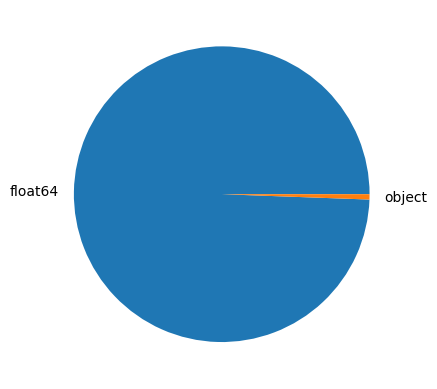

In [ ]:
data.dtypes.value_counts().plot.pie()
data.head()

In [ ]:

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the numerical columns in the DataFrame
data[colonnes_numeriques] = scaler.fit_transform(data[colonnes_numeriques])


In [ ]:
data.head()

,repo,branch,id_build,commit_hash,created_at,updated_at,duration,total_files,additions,deletions,...,language_Ruby,language_Rust,language_Shell,language_Smalltalk,language_Solidity,language_Swift,language_TypeScript,language_Unknown,language_Vim Script,language_Vue
0,aria2/aria2,master,0.986717,a8cb271b044230f38085be7fc185c30eb1f52d36,2024-03-13T01:48:07Z,2024-03-13T01:52:33Z,-0.050392,-0.228728,-0.162461,-0.10005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,aria2/aria2,master,0.973783,a8cb271b044230f38085be7fc185c30eb1f52d36,2024-03-12T01:47:20Z,2024-03-12T01:51:36Z,-0.050398,-0.228728,-0.162461,-0.10005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,aria2/aria2,master,0.960829,a8cb271b044230f38085be7fc185c30eb1f52d36,2024-03-11T01:47:35Z,2024-03-11T01:52:06Z,-0.050389,-0.228728,-0.162461,-0.10005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,aria2/aria2,master,0.954471,a8cb271b044230f38085be7fc185c30eb1f52d36,2024-03-10T01:48:29Z,2024-03-10T01:52:54Z,-0.050393,-0.228728,-0.162461,-0.10005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,aria2/aria2,master,0.948375,a8cb271b044230f38085be7fc185c30eb1f52d36,2024-03-09T01:46:00Z,2024-03-09T01:50:07Z,-0.050403,-0.228728,-0.162461,-0.10005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
existing_columns = [col for col in numerical_columns if col in data.columns]
corr_matrix = data[existing_columns].corr()


# Example DataFrame loading, replace with your actual data loading code
# data = pd.read_csv('builds__.csv')

# List of numerical columns you're interested in
numerical_columns = ['duration', 'total_files', 'additions', 'deletions', 'gh_src_files', 'gh_src_churn', 'total_builds', 'doc_files_count', 'net_code_changes']

# Check and filter columns that exist in your DataFrame
existing_columns = [col for col in numerical_columns if col in data.columns]

# Calculate the correlation matrix for the existing numerical columns
corr_matrix = data[existing_columns].corr()

# Display the correlation matrix
print(corr_matrix)


                 duration  total_files  additions  deletions  gh_src_files  \
duration         1.000000     0.002839  -0.005699   0.010874     -0.004438   
total_files      0.002839     1.000000   0.694768   0.348713      0.609358   
additions       -0.005699     0.694768   1.000000   0.159615      0.436144   
deletions        0.010874     0.348713   0.159615   1.000000      0.125203   
gh_src_files    -0.004438     0.609358   0.436144   0.125203      1.000000   
gh_src_churn    -0.006329     0.610473   0.818933   0.329048      0.601487   
total_builds    -0.072644    -0.124191  -0.078859  -0.073504     -0.075126   
doc_files_count -0.000581     0.682004   0.841147   0.268456      0.213971   

                 gh_src_churn  total_builds  doc_files_count  
duration            -0.006329     -0.072644        -0.000581  
total_files          0.610473     -0.124191         0.682004  
additions            0.818933     -0.078859         0.841147  
deletions            0.329048     -0.073504  

In [ ]:
# Assuming `data` is your DataFrame
# Feature Engineering Example: Creating a net_code_changes feature (if not already created)
data['net_code_changes'] = data['additions'] - data['deletions']

# Identifying Collinearity: Correlation Matrix for numerical columns
numerical_columns = ['duration', 'total_files', 'additions', 'deletions', 'gh_src_files', 'gh_src_churn', 'total_builds', 'doc_files_count']
corr_matrix = data[numerical_columns].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Calculating VIF for numerical columns
# Ensure your features are scaled as VIF is sensitive to scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[numerical_columns])

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_columns
vif_data["VIF"] = [variance_inflation_factor(scaled_features, i) for i in range(len(numerical_columns))]

# Display VIF values sorted by VIF
print("\nVIF Values:")
print(vif_data.sort_values(by="VIF", ascending=False))


Correlation Matrix:
                 duration  total_files  additions  deletions  gh_src_files  \
duration         1.000000     0.002839  -0.005699   0.010874     -0.004438   
total_files      0.002839     1.000000   0.694768   0.348713      0.609358   
additions       -0.005699     0.694768   1.000000   0.159615      0.436144   
deletions        0.010874     0.348713   0.159615   1.000000      0.125203   
gh_src_files    -0.004438     0.609358   0.436144   0.125203      1.000000   
gh_src_churn    -0.006329     0.610473   0.818933   0.329048      0.601487   
total_builds    -0.072644    -0.124191  -0.078859  -0.073504     -0.075126   
doc_files_count -0.000581     0.682004   0.841147   0.268456      0.213971   

                 gh_src_churn  total_builds  doc_files_count  
duration            -0.006329     -0.072644        -0.000581  
total_files          0.610473     -0.124191         0.682004  
additions            0.818933     -0.078859         0.841147  
deletions            0.32

In [ ]:

# Assuming 'duration' is the target variable
target_column = 'duration'

# Check if the target column exists in the DataFrame
if target_column in data.columns:
    # Separate the features (X) and the target variable (y)
    X = data.drop(target_column, axis=1)
    y = data[target_column]

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print("Data successfully split into training and test sets:")
    print("Training set size:", X_train.shape)
    print("Test set size:", X_test.shape)
else:
    print(f"Target column '{target_column}' not found in DataFrame. Please update the target_column variable with the correct column name.")


Data successfully split into training and test sets:
Training set size: (12696, 866)
Test set size: (3174, 866)


In [ ]:
print(data.dtypes)

# Sélection des colonnes numériques uniquement pour éviter le problème
data_numeric = data.select_dtypes(include=[np.number])

# Calcul de la matrice de corrélation pour les colonnes numériques uniquement
corr_matrix_numeric = data_numeric.corr()

# Affichage de la matrice de corrélation pour les colonnes numériques
print(corr_matrix_numeric)


repo                    object
branch                  object
id_build               float64
commit_hash             object
created_at              object
                        ...   
language_TypeScript    float64
language_Unknown       float64
language_Vim Script    float64
language_Vue           float64
net_code_changes       float64
Length: 867, dtype: object
                     id_build  duration  total_files  additions  deletions  \
id_build             1.000000 -0.120147    -0.031013  -0.021322  -0.029342   
duration            -0.120147  1.000000     0.002839  -0.005699   0.010874   
total_files         -0.031013  0.002839     1.000000   0.694768   0.348713   
additions           -0.021322 -0.005699     0.694768   1.000000   0.159615   
deletions           -0.029342  0.010874     0.348713   0.159615   1.000000   
...                       ...       ...          ...        ...        ...   
language_TypeScript  0.143465 -0.008595    -0.009199  -0.033578  -0.015860   
language

In [ ]:
X_train_numeric = pd.get_dummies(X_train)
X_test_numeric = pd.get_dummies(X_test)

# Il est important d'aligner les colonnes de X_train et X_test pour s'assurer qu'elles ont les mêmes caractéristiques après le one-hot encoding
X_train_numeric, X_test_numeric = X_train_numeric.align(X_test_numeric, join='inner', axis=1)  # aligne les colonnes et exclut celles qui ne se trouvent pas dans les deux ensembles

# Ensuite, vous pouvez essayer de réentraîner votre modèle avec ces données transformées
model.fit(X_train_numeric, y_train)

# Et continuez avec la prédiction et l'évaluation comme avant


RandomForestRegressor(random_state=42)

In [ ]:
non_numeric_columns = X_train.select_dtypes(include=['object']).columns
print("Colonnes non numériques dans X_train:", non_numeric_columns)


Colonnes non numériques dans X_train: Index(['repo', 'branch', 'commit_hash', 'created_at', 'updated_at'], dtype='object')


In [ ]:
# Suppression des colonnes qui ne seront pas transformées ou utilisées
X_train = X_train.drop(['commit_hash'], axis=1)
X_test = X_test.drop(['commit_hash'], axis=1)

# Conversion des colonnes temporelles
for col in ['created_at', 'updated_at']:
    X_train[col] = pd.to_datetime(X_train[col]).astype(np.int64) // 10**9
    X_test[col] = pd.to_datetime(X_test[col]).astype(np.int64) // 10**9

# Application du One-Hot Encoding aux colonnes catégorielles restantes
X_train = pd.get_dummies(X_train, columns=['repo', 'branch'])
X_test = pd.get_dummies(X_test, columns=['repo', 'branch'])

# Alignement de X_train et X_test pour s'assurer qu'ils ont les mêmes colonnes après le One-Hot Encoding
X_train, X_test = X_train.align(X_test, join='inner', axis=1)

# Maintenant, X_train et X_test sont prêts à être utilisés pour entraîner le modèle
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Mean Squared Error (MSE): 0.0010798601631678722
Mean Absolute Error (MAE): 0.0029602259804762123
R-squared (R²): 0.9988601403767351


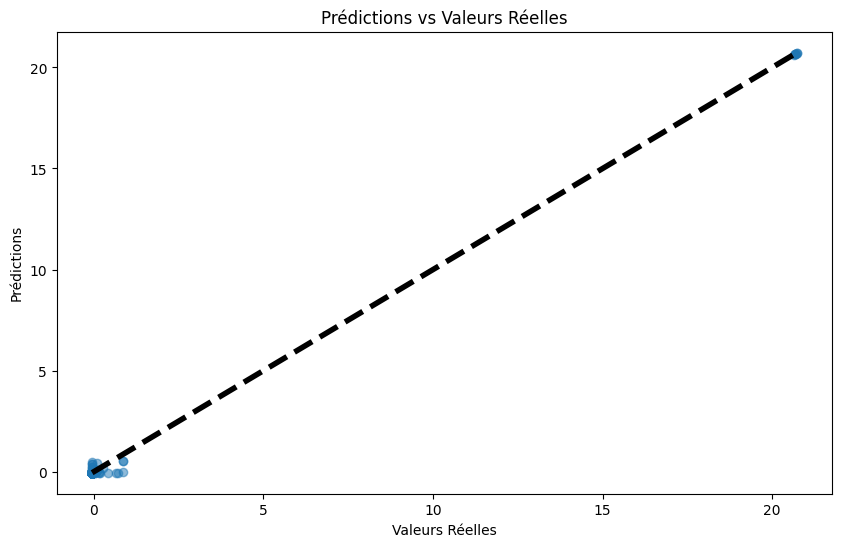

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129482 (\N{ICE CUBE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


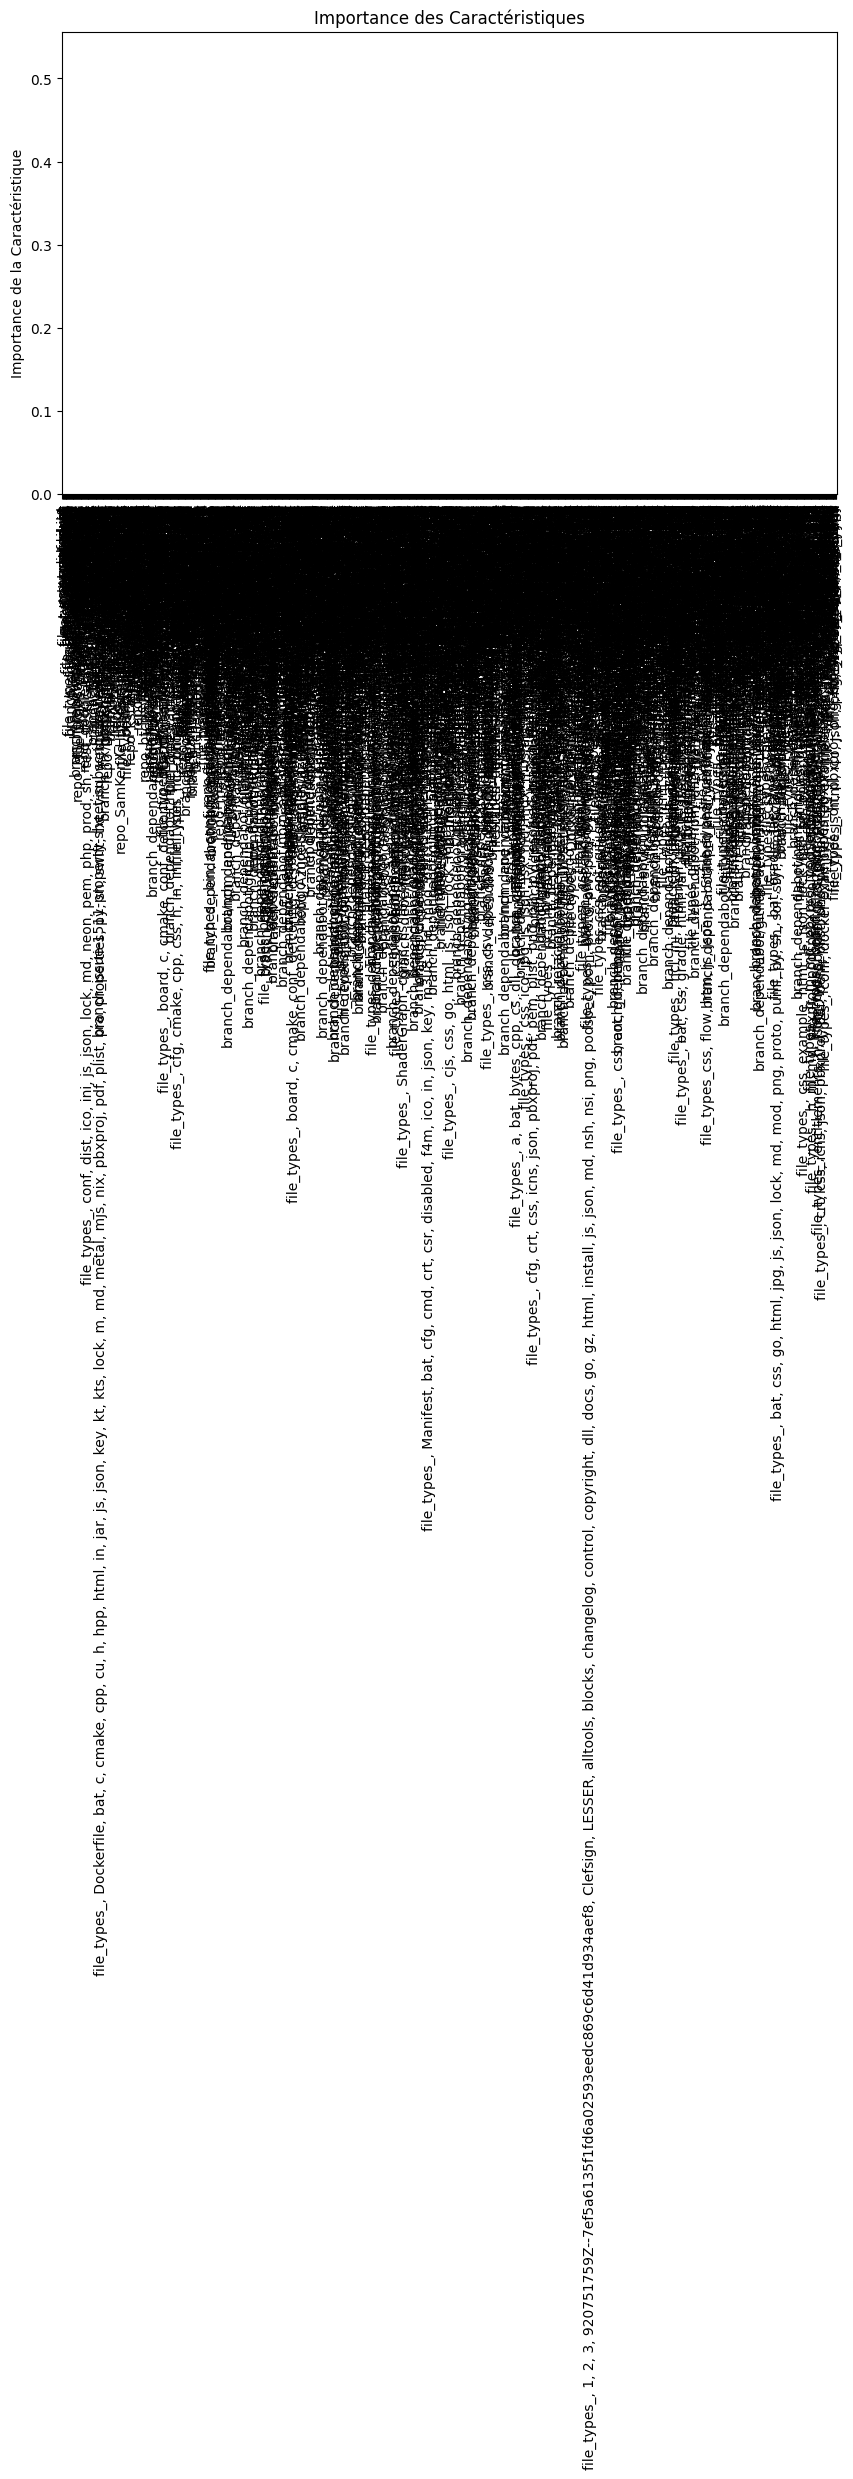

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Assurez-vous que votre modèle RandomForestRegressor est entraîné comme montré précédemment :
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)  # Remplacez X_train et y_train par vos données

# Faites des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)  # Remplacez X_test par vos données de test
# Calcul des métriques
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

# Graphique des prédictions vs valeurs réelles
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.title('Prédictions vs Valeurs Réelles')
plt.show()

# Importance des caractéristiques
feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Importance des Caractéristiques")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.ylabel('Importance de la Caractéristique')
plt.show()





